Решили посмотреть динамику цен на данный продукт в США.

We decided to look at the dynamics of prices for this product in the USA.


Имеется следующий набор данных от Hass Avocado Board 🥑
Data to use:
    
- Date 
- AveragePrice
- Total Volume — qty of sold avocado
- 4046 — amount of sold avocado PLU* 4046
- 4225 — amount of sold avocado PLU 4225
- 4770 — amount of sold avocado PLU 4770
- Total Bags — number of bags
- Small Bags — small bags
- Large Bags — big bags
- XLarge Bags — huge
- type — normal or organic 
- year 
- Region — the city or region of the observation
- *PLU — Product Lookup code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)})

In [15]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])
# read the file

In [17]:
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

Part #1
Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

Calculate the rolling average of the avocado price (AveragePrice) with a window equal to 3 (window). 
What is the maximum value? Round your answer to 2 decimal places.

In [16]:
AveragePrice = avocado_mean.rolling(window = 3).mean().round(2).sort_values().tail() # rolling average 

In [4]:
AveragePrice

Date
2017-09-10    1.84
2017-10-08    1.85
2017-10-01    1.85
2015-01-04     NaN
2015-01-11     NaN
Name: AveragePrice, dtype: float64

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), 
посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

The task is to build rolling average graphs with different values of the window parameter (2, 4, 10, 50),
look at the changes and match the pictures below with the corresponding window size value.

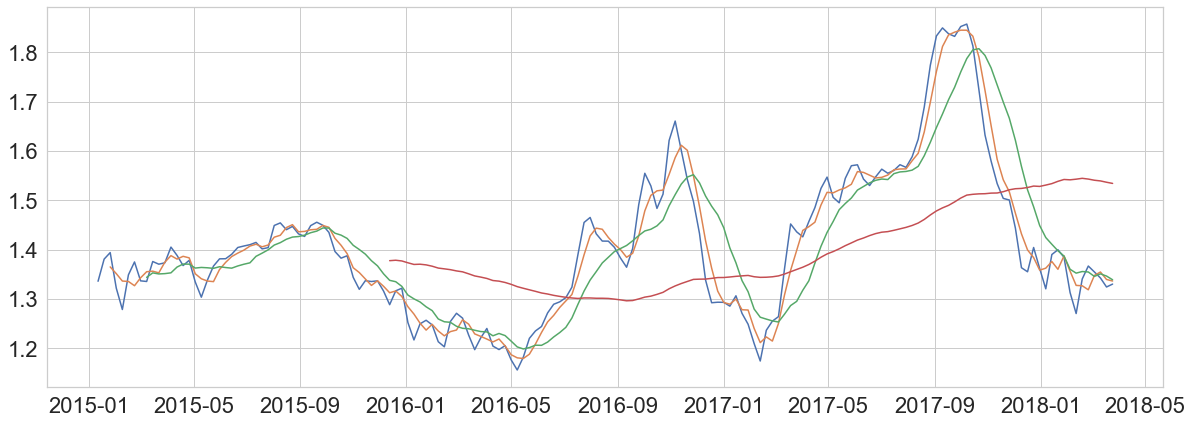

In [5]:

AveragePrice2 = avocado_mean.rolling(window = 2).mean()

AveragePrice4 = avocado_mean.rolling(window = 4).mean()

AveragePrice10 = avocado_mean.rolling(window = 10).mean()

AveragePrice50 = avocado_mean.rolling(window = 50).mean()

AveragePrice2

mean2 = sns.lineplot(data=AveragePrice2)

mean4 = sns.lineplot(data=AveragePrice4)

mean10 = sns.lineplot(data=AveragePrice10)

mean50 = sns.lineplot(data=AveragePrice50)


Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. 
Запишите результат в avocado_ewm

Use aggregated avocado price data and use the ewm() function with span=2 to get an exponential rolling average.
Write the result to avocado_ewm

In [6]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [8]:
#Part2
#Let's upload new df

avocado_full = pd.read_csv('/Users/alinarunaeva/Projects_Python/Avocado_Sales_USA/avocado_full.csv',squeeze=True, parse_dates=['Date'],index_col=0)

avocado_full.shape[0]

avocado_full.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. 
Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

For an organic (type) avocado in Chicago (region), calculate a rolling average with a window of 4 and an exponential rolling average with span=4.
Plot the graphs and then fill in the gaps. Round numbers to three decimal places.

In [9]:

organic = avocado_full.query('type == "organic" and region == "Chicago"').AveragePrice
# select only average price dfor Organic type and Chicago type

In [10]:
organic_rolling = organic.rolling(window=4).mean().round(2)

organic_rolling

Date
2015-01-04     NaN
2015-01-11     NaN
2015-01-18     NaN
2015-01-25    1.73
2015-02-01    1.74
              ... 
2018-02-25    1.65
2018-03-04    1.65
2018-03-11    1.65
2018-03-18    1.65
2018-03-25    1.66
Name: AveragePrice, Length: 169, dtype: float64

In [11]:
avocado_ewm = organic.ewm(span=4).mean().round(2)

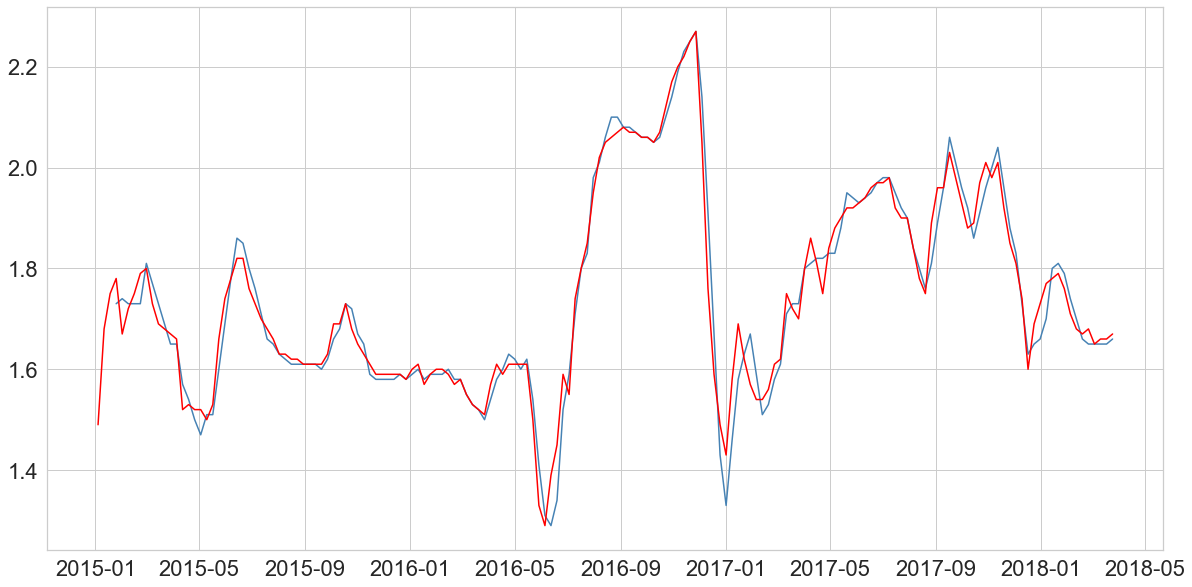

In [12]:
line,ax = plt.subplots(figsize=(20,10))

sns.lineplot(data = organic_rolling, color='steelblue')
sns.lineplot(data = avocado_ewm,color='red')



In [13]:
all_exp = pd.merge(organic_rolling, avocado_ewm, on='Date')

all_exp

,AveragePrice_x,AveragePrice_y
Date,,
2015-01-04,NaN,1.49
2015-01-11,NaN,1.68
2015-01-18,NaN,1.75
2015-01-25,1.73,1.78
2015-02-01,1.74,1.67
...,...,...
2018-02-25,1.65,1.68
2018-03-04,1.65,1.65
2018-03-11,1.65,1.66


In [14]:
all_exp.query("Date == '2016-08-21'")


,AveragePrice_x,AveragePrice_y
Date,,
2017-02-19,1.53,1.56


In [18]:
all_exp.query("Date == '2017-02-19'")

,AveragePrice_x,AveragePrice_y
Date,,
2017-02-19,1.53,1.56


Ряд, полученный с помощью экспоненциального скользящего среднего на промежутке от с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна 2.102, что больше чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось 1.562, и было болльше чем при использовании rolling(), для которого значение было равно 1.532

The series obtained using the exponential moving average over the period from July 2016 to December 2016 is smoother. The average price for an avocado on August 21, 2016 when calculating the moving average was 2.102, which is more than when using the exponential. Feb 19, 2017 ewm() 